<a href="https://colab.research.google.com/github/okorch/project_AI_cancer/blob/main/Cancer_data_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка датасета и создание файла с преобразованными данными

Загруз архива с гугл-диска

In [1]:
!unzip "/content/drive/MyDrive/histopathologic-cancer-detection.zip";

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d5e86165f63c57acdf9d23521f2b8070e0c.tif  
  inflat

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import pandas as pd


In [3]:
labels_df = pd.read_csv('/content/train_labels.csv')

Представление датасета

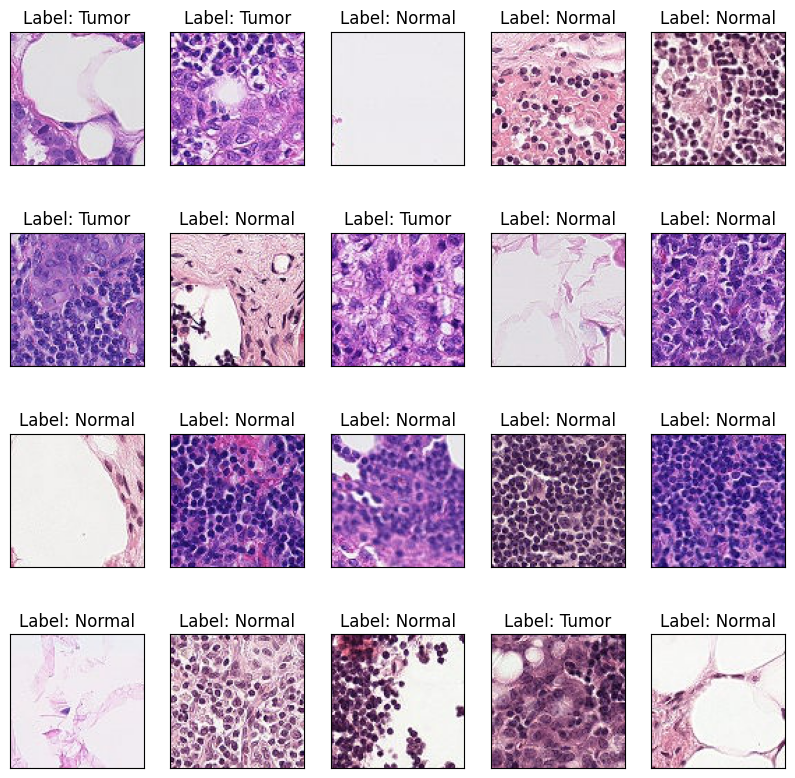

In [4]:
fig = plt.figure(figsize=(10, 10))
path2data = "/content/train"
train_imgs = os.listdir(path2data)
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(4, 20//4, idx+1)
    im = Image.open(path2data + "/" + img)
    plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    
    lab = labels_df.loc[labels_df["id"] == img.split('.')[0], 'label'].values[0]
    ax.set_title(f'Label: {["Tumor" if lab == 1 else "Normal"][0]}')

In [5]:
train  = pd.read_csv('/content/train_labels.csv')
train

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0


In [6]:
 filenames = os.listdir('/content/train')
 filenames

['90bf4420bcd8605376dae6732c6606da97b6f60a.tif',
 'e7e8182c9e128580795009a35b5368c980eaa166.tif',
 '5229f883951df3c78f5ee45218d6389a7a00bae0.tif',
 'c5dcaff3606e4374b67814824f239446ed51d82a.tif',
 'b5b38dab12dfd7d3fd8a45232309d4535f809e06.tif',
 '5a4dc2e6645960f4c532010e1b9013fc4c872bab.tif',
 'de92cc88b9c6bd77452f1ef774dc14ac20a8d149.tif',
 'd794659afe41e61900d4df5190cf0f8b088fa2e8.tif',
 '27404b3bedffbb3fc004e3add97810c3f7ad7dff.tif',
 '2cabe44e052a78b8c7cb735ba1ff4f06131bdcc0.tif',
 '07bab621724f66d132cbf8adca900be4e852d406.tif',
 '97ab2ac0da891a4df86553a32adf35d1e23e6db9.tif',
 '7de1796546422633ba36a444e5e7c0e9e28a5f5c.tif',
 '744280e92516a11848aad68a42df115a6df877f5.tif',
 '3cb3123ce1a770106453ff7cec9b9afaf79082f3.tif',
 'f419544853cbde1eda4b62bb2073e05bdb0007ad.tif',
 '22c8317843d05b748de8d9f3c7d77778d977650d.tif',
 '8a07325eca36e40f1e5bfee86947dbad691367b9.tif',
 'd86cf179a7808b55ed8ea3fa3e31e7ca9aab7d8b.tif',
 'd4bc170b63af2be4217501ab2bc3c9d8793bdca6.tif',
 '5805652da73aa354c4

In [7]:
import torch.nn as nn
import torch.nn.functional as F  # Functional

In [8]:
import torchvision.transforms as transforms

Преобразование в тензоры

In [9]:
from tqdm import tqdm

Созадние массивов с лейблами и 

In [ ]:
X_train = list()
y_train = list()
n = 0
for i in tqdm(filenames[:10000]):
  image = Image.open('/content/train/'+i)
  image = transforms.ToTensor()(image)
  image = transforms.Resize((64, 64))(image)
  X_train.append(image)
  y_train.append(int(train[train['id'] == i[0:-4]]['label']))
  n = n+1  

In [25]:
import pickle

In [26]:
with open('/content/drive/MyDrive/X_train_new.pickle', 'wb') as f:
  pickle.dump((X_train, y_train), f)
 

In [27]:
with open('/content/drive/MyDrive/X_train_new.pickle', 'rb') as f:
  X_train, y_train = pickle.load(f)

In [28]:
X_train

[tensor([[[0.7517, 0.7922, 0.4081,  ..., 0.7373, 0.6949, 0.7316],
          [0.5032, 0.6672, 0.4647,  ..., 0.9211, 0.8787, 0.7588],
          [0.6892, 0.5466, 0.2659,  ..., 0.8252, 0.8610, 0.6985],
          ...,
          [0.6010, 0.4797, 0.5618,  ..., 0.4162, 0.4520, 0.4064],
          [0.5892, 0.4561, 0.3733,  ..., 0.4828, 0.5324, 0.9162],
          [0.2686, 0.2767, 0.4652,  ..., 0.5630, 0.7110, 0.8191]],
 
         [[0.5765, 0.6206, 0.2520,  ..., 0.5819, 0.4784, 0.4865],
          [0.3309, 0.4985, 0.3012,  ..., 0.7819, 0.7049, 0.5365],
          [0.5625, 0.4103, 0.1248,  ..., 0.7051, 0.6944, 0.4914],
          ...,
          [0.4566, 0.3338, 0.4194,  ..., 0.2593, 0.2549, 0.1953],
          [0.4404, 0.3132, 0.2424,  ..., 0.3353, 0.3213, 0.6772],
          [0.1221, 0.1537, 0.3733,  ..., 0.4140, 0.4860, 0.5529]],
 
         [[0.7792, 0.7946, 0.3885,  ..., 0.6566, 0.5765, 0.6132],
          [0.5152, 0.6630, 0.4554,  ..., 0.8574, 0.7882, 0.6375],
          [0.6792, 0.5343, 0.2640,  ...,

In [35]:
int(y_train[0])

0